<a href="https://colab.research.google.com/github/Abhilakshmi-v-s/ml_projects/blob/main/fire_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!cp '/content/drive/MyDrive/dl_class/CNN/wildfire.zip' '/content'

In [45]:
!unzip wildfire.zip

Archive:  wildfire.zip
replace forest_fire/Testing/fire/abc169.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [67]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing import image


In [47]:
traindataset_path = '/content/forest_fire/Training and Validation'
testdatset_path = '/content/forest_fire/Testing'

In [48]:
batch_size = 32
epochs = 10
image_size = (150,150)

In [49]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2
)

In [50]:
training_generator = train_datagen.flow_from_directory(
    traindataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'
)

Found 1467 images belonging to 2 classes.


In [51]:
test_generator = train_datagen.flow_from_directory(
    testdatset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)

Found 13 images belonging to 2 classes.


In [52]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [53]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history=model.fit(training_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
46/46 [==============================] - 7s 78ms/step - loss: 0.2457 - accuracy: 0.9032 - val_loss: 0.3355 - val_accuracy: 0.7692
Epoch 2/10
46/46 [==============================] - 2s 50ms/step - loss: 0.1523 - accuracy: 0.9516 - val_loss: 0.2884 - val_accuracy: 0.9231
Epoch 3/10
46/46 [==============================] - 2s 50ms/step - loss: 0.1238 - accuracy: 0.9666 - val_loss: 0.1873 - val_accuracy: 0.8462
Epoch 4/10
46/46 [==============================] - 2s 52ms/step - loss: 0.1478 - accuracy: 0.9543 - val_loss: 0.2785 - val_accuracy: 0.9231
Epoch 5/10
46/46 [==============================] - 2s 51ms/step - loss: 0.1223 - accuracy: 0.9646 - val_loss: 0.1948 - val_accuracy: 0.9231
Epoch 6/10
46/46 [==============================] - 4s 79ms/step - loss: 0.0887 - accuracy: 0.9686 - val_loss: 0.1567 - val_accuracy: 0.9231
Epoch 7/10
46/46 [==============================] - 3s 64ms/step - loss: 0.0827 - accuracy: 0.9700 - val_loss: 0.1504 - val_accuracy: 0.9231
Epoch 8/10
46

In [55]:
predictions=model.predict(test_generator)
predictions=np.round(predictions)

1/1 [==============================] - 0s 129ms/step


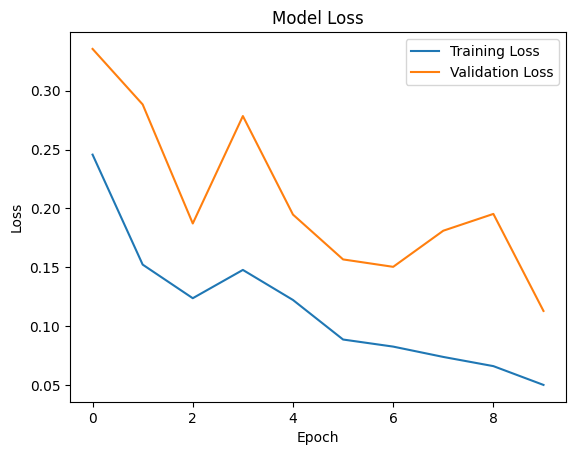

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.show()

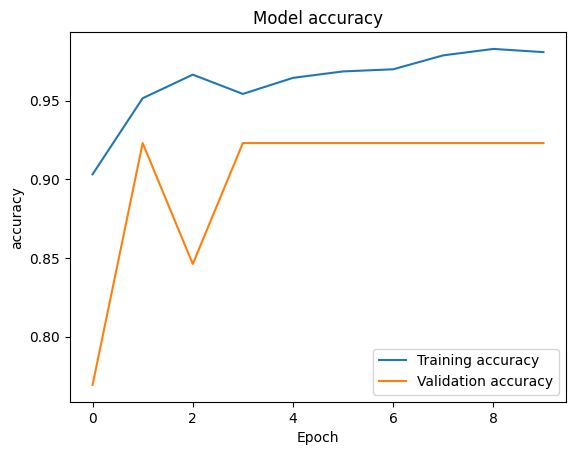

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Training accuracy','Validation accuracy'])
plt.show()

In [83]:
def predict_image(image_path):
  img1 = image.load_img(image_path,target_size = image_size)
  plt.imshow(img1)
  img = image.img_to_array(img1) #converting to  array
  imgs = np.expand_dims(img,axis = 0) #expanding dimens to match for model
  img /=255.0  #normalize
  prediction = model.predict(imgs)

  return "fire" if prediction < 0.5 else "nofire"

1/1 [==============================] - 0s 20ms/step


'fire'

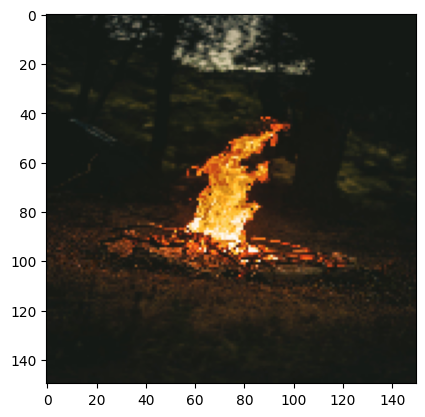

In [84]:
predict_image('/content/drive/MyDrive/dl_class/CNN/fireimg.jpg')

1/1 [==============================] - 0s 30ms/step


'nofire'

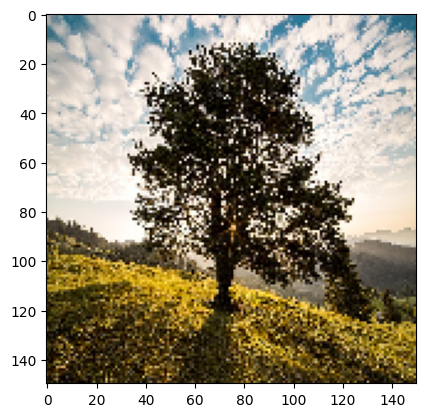

In [85]:
predict_image('/content/drive/MyDrive/dl_class/CNN/tree.jpg')